In [1]:
import tensorflow  as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

for module in tf, np, pd:
    print(module.__name__, module.__version__)

tensorflow 2.0.0
numpy 1.18.1
pandas 1.0.1


In [2]:
import tensorflow_hub as hub

In [3]:
# ImageNet分类器
## 下载分类器
### 使用hub.module加载mobilenet，并tf.keras.layers.Lambda包裹起来作为keras层。hub.tensorflow.google.cn中任何与TensorFlow 2兼容的图像分类器URL都可以在这里使用。

classifier_url ="https://hub.tensorflow.google.cn/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}


In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
# 解码预测
# 根据预测的类ID，获取ImageNet标签并解码预测
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [6]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

# 简单的转移学习
## 使用TF Hub可以很容易地重新训练模型的顶层，以识别数据集中的类。

In [17]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

In [18]:
str(data_root)


'/Users/mac/.keras/datasets/flower_photos'

In [19]:
IMAGE_SHAPE = (224, 224)
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [20]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [21]:
# 在一批图像上运行分类器
# 现在在图像批处理上运行分类器。
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [22]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
# np.argmax(a)#取出a中元素最大值所对应的索引
predicted_class_names

array(['bakery', 'daisy', 'goblet', 'picket fence', 'fig', 'hip',
       'orange', 'lipstick', 'daisy', 'daisy', 'daisy', 'daisy', 'ant',
       'trombone', 'pot', 'earthstar', 'nail', 'admiral', 'sea urchin',
       'pot', 'lycaenid', 'mushroom', 'daisy', 'daisy', 'daisy', 'daisy',
       'bee', 'Bedlington terrier', 'sea urchin', 'coil', 'daisy',
       'daisy'], dtype='<U30')

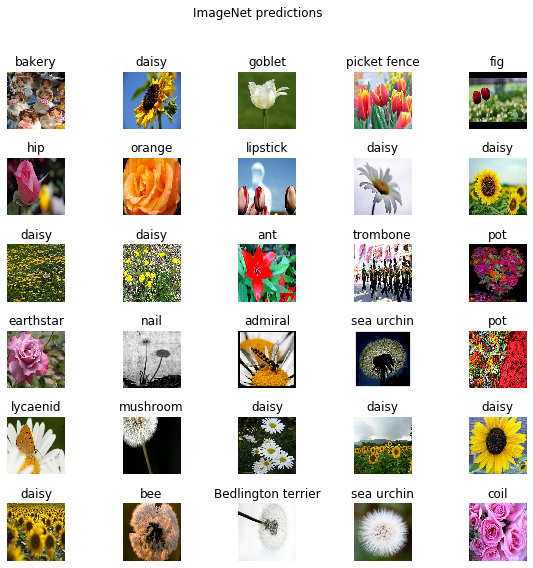

In [23]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

# 结果远非完美，但考虑到这些不是模型训练的类别（“雏菊”除外），这是合理的。



# 检查预测
要重做之前的图，请首先获取类名称的有序列表：

In [24]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

### 加载11_2训练的模型，查看运行结果：



In [25]:
reloaded_model = tf.keras.models.load_model('data/saved_models/1585658810')


In [ ]:
# 通过模型运行图像批处理并将索引转换为类名称。

predicted_batch = reloaded_model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"#注意这种用法
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")